<a href="https://colab.research.google.com/github/rosembergennes/python/blob/master/POSITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregando as BIBLIOTECAS 

In [ ]:
!apt update
!apt install chromium-chromedriver
!pip install dnspython

import time
from datetime import datetime, timedelta
import requests
import pandas as pd
from google.colab import files
import os
import numpy as np
from pandas import DataFrame
import pandas as pd
from datetime import timedelta, date ,datetime
from decimal import Decimal
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime
from pymongo import MongoClient
import pprint
import datetime
import json
# Importando numpy
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date ,datetime
pd.options.display.max_columns = None
pd.options.display.max_rows = None


Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-ba

## OBTENDO DADOS DO ATLAS MONGODB

In [ ]:
# obtendo dados do atlas mongodb
client = MongoClient("mongodb+srv:")
db = client.acoes
collection = db.TCCBIGDATA
data = pd.DataFrame(list(collection.find()))


In [ ]:
# limpeza dos dados em Branco 
data = data.dropna(subset=['SETOR'])
data = data.loc[(data['SETOR'] != "")]

## ANALISANDO MELHORES EMPRESAS PARA INVESTIMENTO A LONGO PRAZO

In [ ]:
# OBSERVAÇÃO METODO ESCOLHIDO.
#
# Após analisar resultados e compara-los com os graficos, observou-se que a utilização da MEDIANA
# representa a melhor tomada de decisão.   
#
# O Periodo diferente do swingtrade não será filtrado, analisando todo periodo disponivel na base
# contemplado o perfil de investidor de position.

# Analisando por oportunidade de ganho a longo prazo. 
# Os investimentos poderão ser focados em acoes dos setores que estão em baixa,
# que devido a natureza do mercado financeiro futuramente poderão se recupera fornecendo assim maior margem de lucro.
# Cabendo ao investidor se deseja optar por tal estrategia. 
# <<< Como não possuimos uma base de longo prazo tal tecnica não pode ser confirmada >>>
#
#
# Nota ==> para que a afirmações acima sejam verdadeira temos que analisar o perfil das ações disponibilizadas pelas empresas,
#          assim temos que levar em consideração os seguintes intes.

# 1.) Filtra por => Ações PREFERENCIAIS, são todas as ações com o campo ESPECI contendo a String PN  
#                  (este tipo de ação alem do rendimento paga dividendos e se os dividendos não forem recuperados converten-se em mais ações).

# 2.) A mediana também se mostrou eficaz na modalidade Position.
# Agrupamos por ação a ser negociada, aplicando em seguida a mediana nos campos PREULT, VPA e GIROATIVO;

# 
# 3.) Ordeno do maior para o menor Giro  <<< LENVAMOS EM CONTA A EFICIENCIA DA EMPRESA >>>
# GIROATIVO >0 em caso de desejar maior regibilidade aumenta-se o GIROATIVO ex : GIROATIVO >0.20
# Empresa como Petrobras PETR4 possuem na presente data GIROATIVO == 0,27
#
# 4.) Geramos o campo pós-crescimento (POS_CRESC), que é a diferença entre o último preço (PREULT) e o valor patrimonial por ação (VPA);
#
# 5.) Calcular o possivel crescimento ( POS_CRESC ),  levando-se em consideração a mediana:
#     POS_CRESC = PREULT-VPA


In [ ]:
# seleciona linhas que contêm a palavra PN
# OBS :
# Qualquer coisa que não seja uma string não pode ter métodos de string aplicados, 
# então o resultado é NaN (naturalmente).
# Só colocamos na=False para esclarecer pois já realizamos esta limpeza em processos anteriores.

# 1.)
df_pn =data[data['ESPECI'].str.contains("PN", na=False )]

# 2.)
# df_pn.head()
df_pn=df_pn.groupby(['CODNEG','NOMRES','SETOR'])[['PREULT','VPA','GIROATIVO']].median().reset_index()

# 3.)
df_empresas_saudaves=df_pn.query('GIROATIVO >0.20 & VPA >0 & VPA <PREULT')
df_empresas_saudaves.head()

,CODNEG,NOMRES,SETOR,PREULT,VPA,GIROATIVO
1,AHEB5,SPTURIS,Exploração de Imóveis,24.890,1.070,0.390
2,AHEB6,SPTURIS,Exploração de Imóveis,24.915,1.805,0.365
3,ALPA4,ALPARGATAS,"Tecidos, Vestuário e Calçados",35.925,4.850,0.480
4,ALUP4,ALUPAR,Energia Elétrica,7.045,6.040,0.240
7,BALM4,BAUMER,Máquinas e Equipamentos,12.390,10.760,0.720


In [ ]:
# OBSERVAÇÃO TECNICA I
# a DataFrame é que você está tentando fazer uma operação chamada chained indexing, 
# Adotamos refazer o indice
df_pos_cres = df_empresas_saudaves.reset_index(drop=True) 
# df_pos_cres.head()


In [ ]:

# 4.)
df_pos_cres['POS_CRESC']=df_pos_cres['PREULT']-df_pos_cres['VPA']
# df_pos_cres.head()

# 5.) 
df_pos_cres_ordenado= df_pos_cres.sort_values("POS_CRESC",ascending=True)
# df_pos_cres_ordenado.head()

df_pos_cres_ordenado_top10=df_pos_cres_ordenado.head(10).reset_index(drop=True)
df_pos_cres_ordenado_top10['NOMRES_CODNEG']=df_pos_cres_ordenado_top10.apply(lambda x:'%s (%s %s)' % (x['NOMRES'],x['CODNEG'],x['SETOR']),axis=1)
df_pos_cres_ordenado_top10["PREULT"]=round(df_pos_cres_ordenado_top10["PREULT"],2)
df_pos_cres_ordenado_top10["VPA"]=round(df_pos_cres_ordenado_top10["VPA"],2)
df_pos_cres_ordenado_top10["GIROATIVO"]=round(df_pos_cres_ordenado_top10["GIROATIVO"],2)
df_pos_cres_ordenado_top10["POS_CRESC"]=round(df_pos_cres_ordenado_top10["POS_CRESC"],2)
df_pos_cres_ordenado_top10.head(15)

,CODNEG,NOMRES,SETOR,PREULT,VPA,GIROATIVO,POS_CRESC,NOMRES_CODNEG
0,CRPG6,CRISTAL,Químicos,20.95,20.86,0.61,0.09,CRISTAL (CRPG6 Químicos)
1,PATI4,PANATLANTICA,Siderurgia e Metalurgia,28.96,28.76,0.88,0.20,PANATLANTICA (PATI4 Siderurgia e Metalurgia)
2,POMO4,MARCOPOLO,Material de Transporte,2.84,2.61,0.69,0.23,MARCOPOLO (POMO4 Material de Transporte)
3,ALUP4,ALUPAR,Energia Elétrica,7.04,6.04,0.24,1.00,ALUPAR (ALUP4 Energia Elétrica)
4,OIBR4,OI,Telefonia Fixa,2.46,1.36,0.26,1.10,OI (OIBR4 Telefonia Fixa)
5,SAPR4,SANEPAR,Água e Saneamento,5.44,4.29,0.38,1.15,SANEPAR (SAPR4 Água e Saneamento)
6,BALM4,BAUMER,Máquinas e Equipamentos,12.39,10.76,0.72,1.63,BAUMER (BALM4 Máquinas e Equipamentos)
7,GGBR4,GERDAU,Siderurgia e Metalurgia,19.64,17.48,0.60,2.16,GERDAU (GGBR4 Siderurgia e Metalurgia)
8,TIET4,AES TIETE E,Energia Elétrica,2.96,0.78,0.24,2.18,AES TIETE E (TIET4 Energia Elétrica)
9,EMAE4,EMAE,Energia Elétrica,29.94,27.57,0.28,2.37,EMAE (EMAE4 Energia Elétrica)


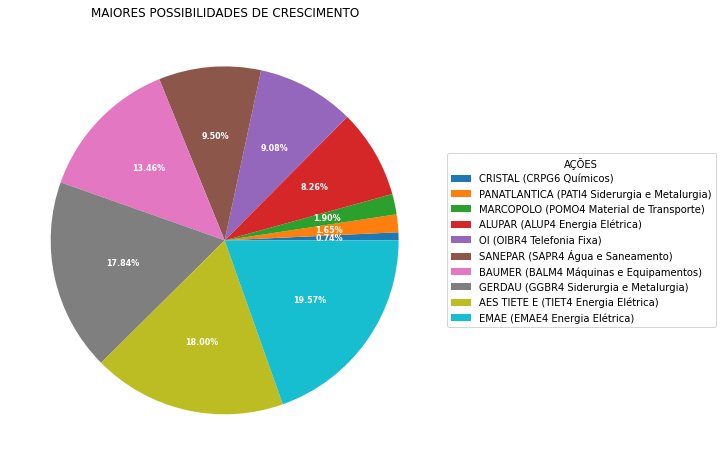

In [ ]:
# Area de plotagem do Grafico definindo o tamanho figsize=(8,8)
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))

# Matriz dos dados (valores,titulos)
valores =  df_pos_cres_ordenado_top10["POS_CRESC"].head(10)
titulos =  df_pos_cres_ordenado_top10["NOMRES_CODNEG"].head(10)

# Calculo para porcentagem dentro do grafico
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%".format(pct, absolute)

# Criando o grafico e acertando as legendas
wedges, texts, autotexts = ax.pie(valores, autopct=lambda pct: func(pct, valores),
                                  textprops=dict(color="w"))

ax.legend(wedges, titulos,
          title="AÇÕES",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("MAIORES POSSIBILIDADES DE CRESCIMENTO")

plt.show()